In [1]:
import numpy as np
import pandas as pd

calendar_df = pd.read_csv('E:/Documents/TanXor/Dataset/calendar.csv')
sales_df = pd.read_csv('E:/Documents/TanXor/Dataset/sales_train_validation.csv')
prices_df = pd.read_csv('E:/Documents/TanXor/Dataset/sell_prices.csv')

In [2]:
states = len(sales_df['state_id'].unique())
stores = len(sales_df['store_id'].unique())
item_cat = len(sales_df['cat_id'].unique())
depts = len(sales_df['dept_id'].unique())
items = len(sales_df['item_id'].unique())
f'The data comprises for {states} States, {stores} Stores, {item_cat} Item Categories, {depts} Departments, {items} Items'

'The data comprises for 3 States, 10 Stores, 3 Item Categories, 7 Departments, 3049 Items'

In [3]:
sales_df.isnull().sum().sort_values(ascending=False)
sales_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [4]:
#calendar_df.isnull().sum().sort_values(ascending=False)
calendar_df

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [5]:
#calendar_df['event_name_1'].unique()
calendar_df[calendar_df.d == 'd_331']

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
330,2011-12-25,11148,Sunday,2,12,2011,d_331,Christmas,National,NaN,NaN,0,0,0


In [6]:
#prices_df.isnull().sum().sort_values(ascending=False)
prices_df.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [7]:
stores = sales_df['store_id'].unique()
depts = sales_df['dept_id'].unique()
print('Stores:', stores)
print('Depts:', depts)

Stores: ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']
Depts: ['HOBBIES_1' 'HOBBIES_2' 'HOUSEHOLD_1' 'HOUSEHOLD_2' 'FOODS_1' 'FOODS_2'
 'FOODS_3']


In [8]:
sales_df['d_id'] = sales_df['store_id'] + '_' + sales_df['dept_id']

sales_df = sales_df.drop(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], axis=1)

sales_df = sales_df.groupby('d_id').sum()

sales_df = sales_df.T

sales_df

d_id,CA_1_FOODS_1,CA_1_FOODS_2,CA_1_FOODS_3,CA_1_HOBBIES_1,CA_1_HOBBIES_2,CA_1_HOUSEHOLD_1,CA_1_HOUSEHOLD_2,CA_2_FOODS_1,CA_2_FOODS_2,CA_2_FOODS_3,...,WI_2_HOBBIES_2,WI_2_HOUSEHOLD_1,WI_2_HOUSEHOLD_2,WI_3_FOODS_1,WI_3_FOODS_2,WI_3_FOODS_3,WI_3_HOBBIES_1,WI_3_HOBBIES_2,WI_3_HOUSEHOLD_1,WI_3_HOUSEHOLD_2
d_1,297,674,2268,528,28,361,181,406,212,1575,...,10,353,98,152,583,2293,256,22,584,148
d_2,284,655,2198,489,9,350,170,408,227,1286,...,7,268,94,138,585,2383,342,14,541,195
d_3,214,396,1398,409,6,279,114,238,138,913,...,18,250,69,127,575,1841,228,20,420,106
d_4,175,476,1607,383,9,278,123,240,174,1126,...,15,305,80,98,533,1965,183,11,327,94
d_5,182,354,1496,263,5,195,135,220,102,956,...,1,118,32,87,340,1427,70,4,151,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1909,287,423,1780,333,30,665,204,422,450,1634,...,26,800,113,180,473,1579,202,42,535,148
d_1910,297,365,1871,380,30,580,186,334,349,1578,...,25,907,127,227,411,1670,182,21,573,142
d_1911,331,489,2140,471,56,695,205,579,396,1896,...,37,1106,160,261,507,1897,264,32,701,166
d_1912,419,590,2646,621,49,933,319,623,620,2517,...,25,1177,194,324,505,2411,381,32,801,232


In [9]:
for i in sales_df.columns:
    print(i, ': ', sales_df[sales_df[i] <= 0].index, len(sales_df[sales_df[i] <= 0]))

CA_1_FOODS_1 :  Index(['d_331', 'd_697', 'd_1062', 'd_1427', 'd_1792'], dtype='object') 5
CA_1_FOODS_2 :  Index(['d_331', 'd_697', 'd_1062', 'd_1427', 'd_1792'], dtype='object') 5
CA_1_FOODS_3 :  Index(['d_331', 'd_697', 'd_1062', 'd_1427', 'd_1792'], dtype='object') 5
CA_1_HOBBIES_1 :  Index(['d_331', 'd_697', 'd_1062', 'd_1427', 'd_1792'], dtype='object') 5
CA_1_HOBBIES_2 :  Index(['d_331', 'd_697', 'd_1062', 'd_1427', 'd_1792'], dtype='object') 5
CA_1_HOUSEHOLD_1 :  Index(['d_331', 'd_697', 'd_1062', 'd_1427', 'd_1792'], dtype='object') 5
CA_1_HOUSEHOLD_2 :  Index(['d_331', 'd_697', 'd_1062', 'd_1427', 'd_1792'], dtype='object') 5
CA_2_FOODS_1 :  Index(['d_331', 'd_697', 'd_1062', 'd_1427', 'd_1792'], dtype='object') 5
CA_2_FOODS_2 :  Index(['d_331', 'd_697', 'd_1062', 'd_1349', 'd_1350', 'd_1427', 'd_1792'], dtype='object') 7
CA_2_FOODS_3 :  Index([], dtype='object') 0
CA_2_HOBBIES_1 :  Index(['d_331', 'd_697', 'd_1062', 'd_1427', 'd_1792'], dtype='object') 5
CA_2_HOBBIES_2 :  Inde

In [10]:
sales_df['d'] = sales_df.index

df = sales_df.merge(calendar_df, how = 'outer')

df = df.drop(['wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'], axis=1)

df['date']=pd.to_datetime(df['date'])

df.set_index('date',inplace=True)

df = df.dropna()

df

,CA_1_FOODS_1,CA_1_FOODS_2,CA_1_FOODS_3,CA_1_HOBBIES_1,CA_1_HOBBIES_2,CA_1_HOUSEHOLD_1,CA_1_HOUSEHOLD_2,CA_2_FOODS_1,CA_2_FOODS_2,CA_2_FOODS_3,...,WI_2_HOBBIES_2,WI_2_HOUSEHOLD_1,WI_2_HOUSEHOLD_2,WI_3_FOODS_1,WI_3_FOODS_2,WI_3_FOODS_3,WI_3_HOBBIES_1,WI_3_HOBBIES_2,WI_3_HOUSEHOLD_1,WI_3_HOUSEHOLD_2
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,297.0,674.0,2268.0,528.0,28.0,361.0,181.0,406.0,212.0,1575.0,...,10.0,353.0,98.0,152.0,583.0,2293.0,256.0,22.0,584.0,148.0
2011-01-30,284.0,655.0,2198.0,489.0,9.0,350.0,170.0,408.0,227.0,1286.0,...,7.0,268.0,94.0,138.0,585.0,2383.0,342.0,14.0,541.0,195.0
2011-01-31,214.0,396.0,1398.0,409.0,6.0,279.0,114.0,238.0,138.0,913.0,...,18.0,250.0,69.0,127.0,575.0,1841.0,228.0,20.0,420.0,106.0
2011-02-01,175.0,476.0,1607.0,383.0,9.0,278.0,123.0,240.0,174.0,1126.0,...,15.0,305.0,80.0,98.0,533.0,1965.0,183.0,11.0,327.0,94.0
2011-02-02,182.0,354.0,1496.0,263.0,5.0,195.0,135.0,220.0,102.0,956.0,...,1.0,118.0,32.0,87.0,340.0,1427.0,70.0,4.0,151.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-20,287.0,423.0,1780.0,333.0,30.0,665.0,204.0,422.0,450.0,1634.0,...,26.0,800.0,113.0,180.0,473.0,1579.0,202.0,42.0,535.0,148.0
2016-04-21,297.0,365.0,1871.0,380.0,30.0,580.0,186.0,334.0,349.0,1578.0,...,25.0,907.0,127.0,227.0,411.0,1670.0,182.0,21.0,573.0,142.0
2016-04-22,331.0,489.0,2140.0,471.0,56.0,695.0,205.0,579.0,396.0,1896.0,...,37.0,1106.0,160.0,261.0,507.0,1897.0,264.0,32.0,701.0,166.0


### Visualizing the Data

<AxesSubplot:xlabel='date'>

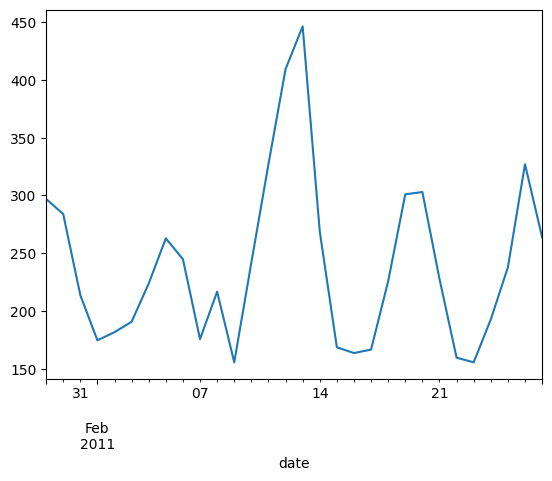

In [11]:
df['CA_1_FOODS_1'].iloc[:30].plot()

In [12]:
df_1 = df[['CA_1_FOODS_1']].copy()
df_1.rename(columns = {'CA_1_FOODS_1':'Sales'}, inplace = True)
df_1.index = df.index
df_1.head()

,Sales
date,
2011-01-29,297.0
2011-01-30,284.0
2011-01-31,214.0
2011-02-01,175.0
2011-02-02,182.0


In [13]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [15]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adfuller_test(df_1['Sales'])

ADF Test Statistic : -3.6874383873979255
p-value : 0.004293354278854127
#Lags Used : 26
Number of Observations Used : 1886
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Feature Engineering

In [17]:
# Shifting (Lag)

df_1['Sales_shifted'] = df_1['Sales'].shift(7)
df_1.head()

,Sales,Sales_shifted
date,,
2011-01-29,297.0,NaN
2011-01-30,284.0,NaN
2011-01-31,214.0,NaN
2011-02-01,175.0,NaN
2011-02-02,182.0,NaN


In [18]:
# LogTransformation

df_1['adj_log'] = np.log(df_1['Sales'])
df_1.head()

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Sales,Sales_shifted,adj_log
date,,,
2011-01-29,297.0,NaN,5.693732
2011-01-30,284.0,NaN,5.648974
2011-01-31,214.0,NaN,5.365976
2011-02-01,175.0,NaN,5.164786
2011-02-02,182.0,NaN,5.204007


In [19]:
# Differencing

df_1['Seasonal_Differnce'] = df_1['Sales'] - df_1['Sales_shifted']

ADF Test Statistic : -12.594576022258648
p-value : 1.7904543420599198e-23
#Lags Used : 21
Number of Observations Used : 1884
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


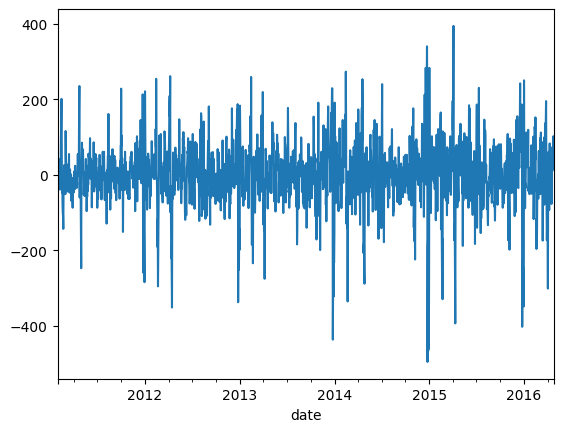

In [20]:
df_1['Seasonal_Differnce'].plot()
adfuller_test(df_1['Seasonal_Differnce'].dropna())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

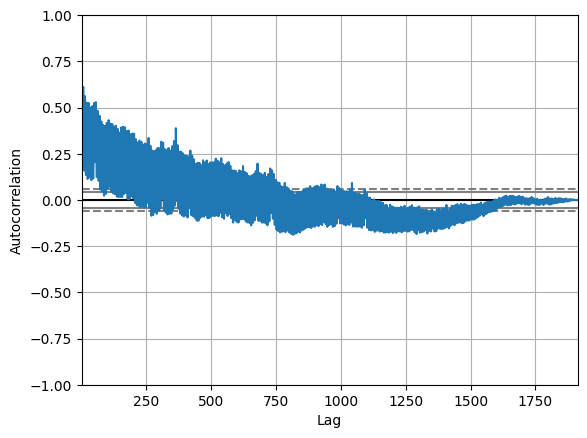

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_1['Sales'])

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import matplotlib.pyplot as plt

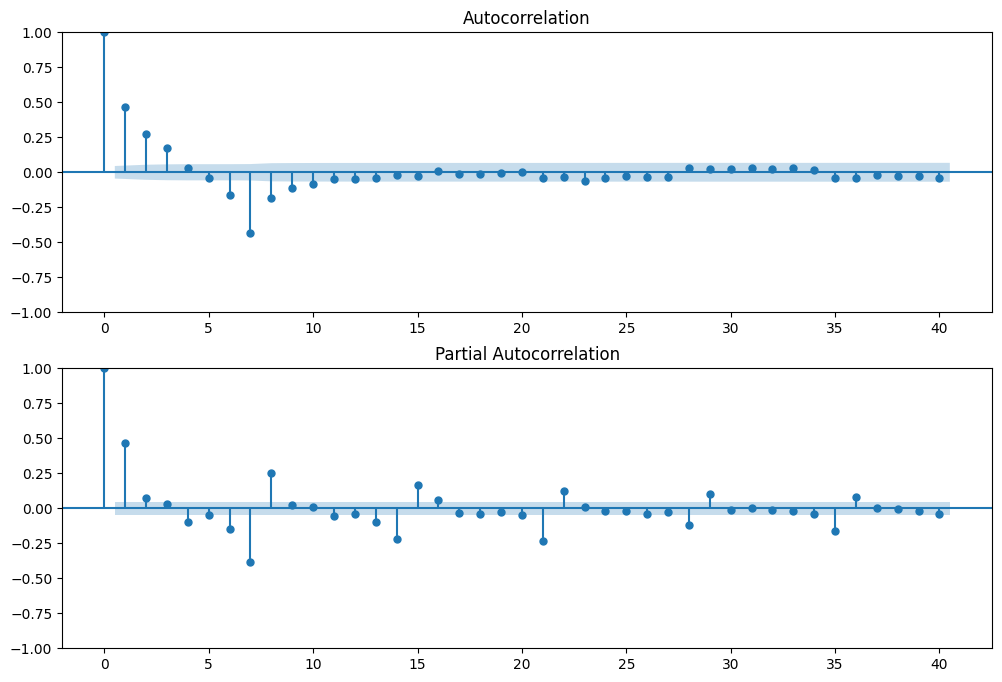

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_1['Seasonal_Differnce'].iloc[8:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_1['Seasonal_Differnce'].iloc[8:],lags=40,ax=ax2)

In [24]:
from statsmodels.tsa.stattools import acf,pacf
df_acf = pd.DataFrame(acf(df_1['Sales']))
print(df_acf[0:5])

          0
0  1.000000
1  0.677064
2  0.402974
3  0.262694
4  0.223691


In [25]:
model=ARIMA(df_1['Sales'],order=(1,1,2))
model_fit=model.fit()

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<AxesSubplot:xlabel='date'>

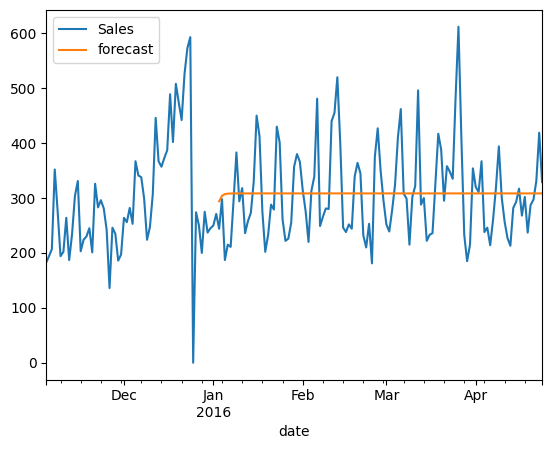

In [26]:
df_1['forecast']=model_fit.predict(start=1800,end=1913,dynamic=True)
df_1[['Sales','forecast']].iloc[1740:].plot()

In [27]:
model=sm.tsa.statespace.SARIMAX(df_1['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,7))
results=model.fit()

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='date'>

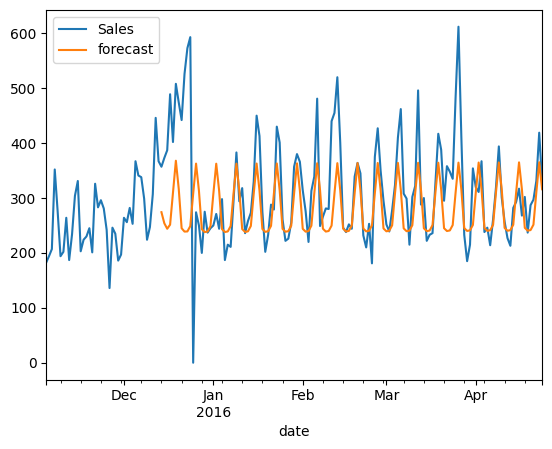

In [28]:
df_1['forecast']=results.predict(start=1780,end=1913,dynamic=True)
df_1[['Sales','forecast']].iloc[1740:].plot()

In [29]:
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning

# Ignore ValueWarning from statsmodels
warnings.simplefilter('ignore', ValueWarning)

In [30]:
### Import Packages ###
'''
import itertools
import statsmodels.api as sm

### Define Parameter Ranges to Test ###

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = range(1, 6)
q = range(0, 6)
d = range(1, 2)
P = range(0, 4)
Q = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(P, d, Q))]

### Run Grid Search ###

# Note: this code will take a while to run

# Define function
def sarimax_gridsearch(ts, pdq, pdqs, freq='D'):
    
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False, 
                                                enforce_invertibility=False,
                                                freq=freq)

                output = mod.fit(maxiter=1000)
                predictions = output.predict(start=1800,end=1913,dynamic=True)

                test_data = ts.iloc[1800:1913]
                mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100

                ans.append([comb, combs, output.bic, mape])
                print('SARIMAX {} x {}12 : MAPE Calculated ={}'.format(comb, combs, mape))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic', 'mape'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['mape'],ascending=True)
    
    return ans_df
    
'''

"\nimport itertools\nimport statsmodels.api as sm\n\n### Define Parameter Ranges to Test ###\n\n# Note: higher numbers will result in code taking much longer to run\n# Here we have it set to test p,d,q each = 0, 1 & 2\n\n# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)\np = range(1, 6)\nq = range(0, 6)\nd = range(1, 2)\nP = range(0, 4)\nQ = range(0, 4)\n\n# Generate all different combinations of p, q and q triplets\npdq = list(itertools.product(p, d, q))\n\n# Generate all different combinations of seasonal p, q and q triplets\n# Note: here we have 12 in the 's' position as we have monthly data\n# You'll want to change this according to your time series' frequency\npdqs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(P, d, Q))]\n\n### Run Grid Search ###\n\n# Note: this code will take a while to run\n\n# Define function\ndef sarimax_gridsearch(ts, pdq, pdqs, freq='D'):\n    \n    Input: \n        ts : your time series data\n        pdq : ARIMA co

In [31]:
### Apply function to your time series data ###

# Remember to change frequency to match your time series data
# best_params = sarimax_gridsearch(df_1['Sales'], pdq, pdqs, freq='D')

In [32]:
# best_params.head(20)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                 1913
Model:             SARIMAX(3, 1, 3)x(0, 1, [1], 7)   Log Likelihood              -10462.570
Date:                             Thu, 03 Aug 2023   AIC                          20941.139
Time:                                     13:57:12   BIC                          20985.511
Sample:                                 01-29-2011   HQIC                         20957.476
                                      - 04-24-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.0533      0.069    -29.792      0.000      -2.188      -1.918
ar.L2         -1.1877      

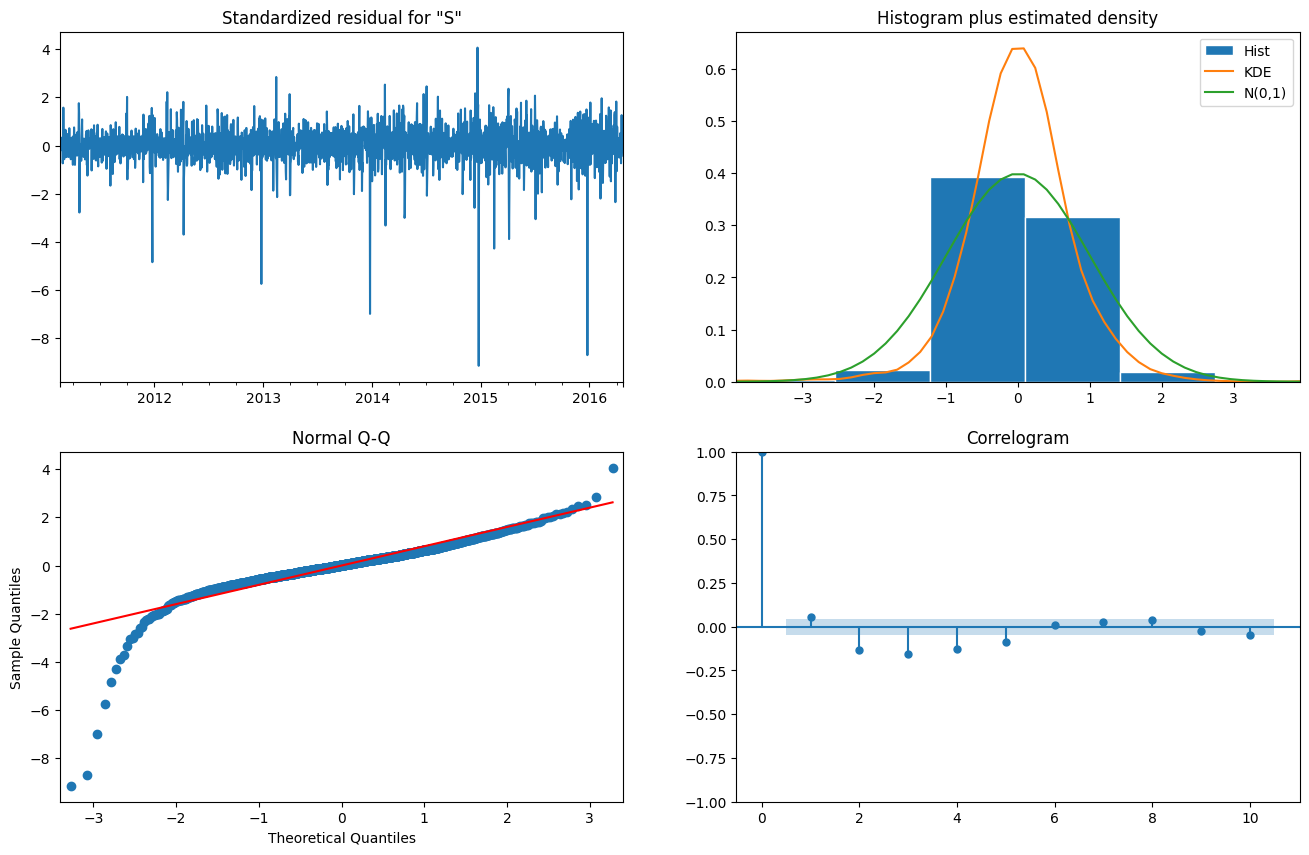

In [33]:
# Build SARIMAX model w/optimal parameters
sarimax = sm.tsa.statespace.SARIMAX(df_1['Sales'], 
                                    order=(3,1,3), 
                                    seasonal_order=(0,1,1,7), 
                                    enforce_stationarity=False, 
                                    enforce_invertibility=False,
                                    freq='D')
                                    
# Fit the model
output = sarimax.fit()
    
# Print output summary
print(output.summary())

# Plot diagnostics
output.plot_diagnostics(figsize=(16,10));

<AxesSubplot:xlabel='date'>

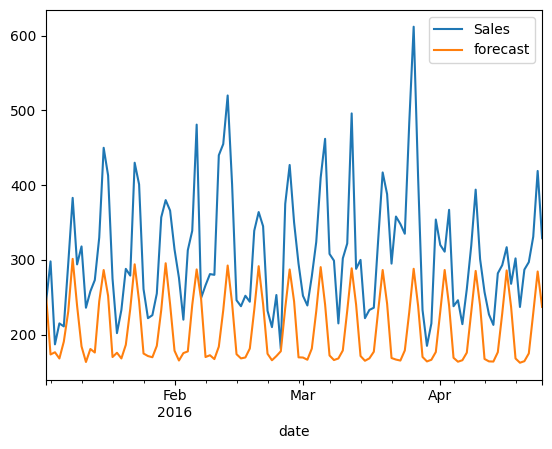

In [34]:
df_1['forecast']=output.predict(start=1800,end=1913,dynamic=True)
df_1[['Sales','forecast']].iloc[1800:].plot()

In [35]:
%pip install optuna


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/390.6 kB ? eta -:--:--
     ---                                      30.7/390.6 kB ? eta -:--:--
     ---                                   41.0/390.6 kB 393.8 kB/s eta 0:00:01
     ------                                71.7/390.6 kB 491.5 kB/s eta 0:00:01
     ----------                           112.6/390.6 kB 598.8 kB/s eta 0:00:01
     -----------                          122.9/390.6 kB 554.9 kB/s eta 0:00:01
     --------------------                 225.3/390.6 kB 765.3 kB/s eta 0:00:01
     -----------------------              256.0/390.6 kB 749.3 kB/s eta 0:00:01
     --------------------------           286.7/390.6 kB 708.9 kB/s eta 0:00:01
     ---------------------------------    368.6/390.6 kB 820.1 kB/s eta 0:00:01
     ------------------------------------ 390.6/390.6 kB 812.7 kB/s eta 0:00:00
                                              0.0/224.5 kB ? eta -:--:--
     ------------------------------------- 224.5/224.5 kB 1

In [42]:
import optuna
from sklearn.model_selection import cross_val_score
#from sklearn import datasets

def objective(trial):
    p = trial.suggest_int('p', 0, 6)
    # d = trial.suggest_int('d', 1, 3)
    q = trial.suggest_int('q', 0, 6)
    P = trial.suggest_int('P', 0, 6)
    Q = trial.suggest_int('Q', 0, 6)
    # m = trial.suggest_int('m', 3, 8)
    srx = sm.tsa.statespace.SARIMAX(df_1['Sales'], 
                                    order=(p,1,q), 
                                    seasonal_order=(P,1,Q,7), 
                                    enforce_stationarity=False, 
                                    enforce_invertibility=False,
                                    freq='D')
    
    output = srx.fit(maxiter=1000)
    predictions = output.predict(start=1800,end=1913,dynamic=True)

    test_data = df_1['Sales'].iloc[1800:1913]
    mape = np.mean(np.abs((test_data - predictions) / test_data)) * 100

    return mape

In [43]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

[I 2023-08-03 14:13:44,980] A new study created in memory with name: no-name-d3a88e2d-70c2-4299-ac37-ded2f1338b2c


[I 2023-08-03 14:15:03,353] Trial 0 finished with value: 35.36506206278672 and parameters: {'p': 2, 'q': 3, 'P': 2, 'Q': 3}. Best is trial 0 with value: 35.36506206278672.
[I 2023-08-03 14:16:30,499] Trial 1 finished with value: 13.566051763840193 and parameters: {'p': 2, 'q': 1, 'P': 0, 'Q': 6}. Best is trial 1 with value: 13.566051763840193.
[I 2023-08-03 14:17:23,963] Trial 2 finished with value: 13.443581957988687 and parameters: {'p': 5, 'q': 2, 'P': 1, 'Q': 2}. Best is trial 2 with value: 13.443581957988687.
[I 2023-08-03 14:22:10,481] Trial 3 finished with value: 13.268217980441523 and parameters: {'p': 2, 'q': 4, 'P': 5, 'Q': 3}. Best is trial 3 with value: 13.268217980441523.
[I 2023-08-03 14:26:45,525] Trial 4 finished with value: 34.92832687890298 and parameters: {'p': 3, 'q': 3, 'P': 5, 'Q': 1}. Best is trial 3 with value: 13.268217980441523.
[I 2023-08-03 14:26:57,331] Trial 5 finished with value: 21.527837123181147 and parameters: {'p': 3, 'q': 3, 'P': 0, 'Q': 0}. Best is

KeyboardInterrupt: 

In [ ]:
trial = study.best_trial
print('Mape: {}'.format(trial.value))

In [ ]:
print("Best hyperparameters: {}".format(trial.params))